In [1]:
import pandas as pd
import numpy as np
import statistics

def most_common(row):
    return max(set(row), key=row.count)

def get_seconds(row):
    return row.second

def sort_dt(row):
    return sorted(row)

def get_td_mean(row):
    td = 0
    if len(row) > 2:
        for i in range (0,len(row)-1):
            td += row[i+1]-row[i]
        return td/(len(row)-1)
    else:
        return 0
        
def get_td_sd(row):
    sd = 0
    new_list = []
    if len(row) > 2:
        for i in range (0,len(row)-1):
            new_list.append(row[i+1]-row[i])
        return statistics.stdev(new_list)
    else:
        return 0
        

In [2]:
data = pd.read_csv("/Users/siboraseranaj/Downloads/stingar_full-20190523(2).csv")
data

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,app,command,data,dest_ip,dest_port,dionaea_action,direction,hash,ids_type,...,ssh_version,tags,timestamp,transport,type,url,username,vendor_product,d_time,d_time_window
0,0,dionaea,NaN,NaN,172.18.0.2,1433,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:00.099290,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:00,2019-05-23 03:25:00
1,1,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:00.178565,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:00,2019-05-23 03:25:00
2,2,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:00.511274,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:00,2019-05-23 03:25:00
3,3,dionaea,NaN,NaN,172.18.0.2,1433,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:01.257961,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:01,2019-05-23 03:25:00
4,4,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:01.582025,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:01,2019-05-23 03:25:00
5,5,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:01.721635,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:01,2019-05-23 03:25:00
6,6,cowrie,NaN,NaN,172.18.0.2,2223,NaN,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:02.240231,tcp,cowrie.sessions,NaN,NaN,Cowrie,2019-05-23 03:25:02,2019-05-23 03:25:00
7,7,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:02.965917,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:02,2019-05-23 03:25:00
8,8,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:02.966709,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:02,2019-05-23 03:25:00
9,9,cowrie,NaN,NaN,172.18.0.2,2223,NaN,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:03.300280,tcp,cowrie.sessions,NaN,NaN,Cowrie,2019-05-23 03:25:03,2019-05-23 03:25:00


In [3]:
data.columns

Index(['Unnamed: 0', 'app', 'command', 'data', 'dest_ip', 'dest_port',
       'dionaea_action', 'direction', 'hash', 'ids_type', 'protocol',
       'request_url', 'sensor', 'severity', 'signature', 'src_ip', 'src_port',
       'ssh_password', 'ssh_username', 'ssh_version', 'tags', 'timestamp',
       'transport', 'type', 'url', 'username', 'vendor_product', 'd_time',
       'd_time_window'],
      dtype='object')

In [4]:
data.dtypes

Unnamed: 0         int64
app               object
command           object
data              object
dest_ip           object
dest_port          int64
dionaea_action    object
direction         object
hash              object
ids_type          object
protocol          object
request_url       object
sensor            object
severity          object
signature         object
src_ip            object
src_port           int64
ssh_password      object
ssh_username      object
ssh_version       object
tags              object
timestamp         object
transport         object
type              object
url               object
username          object
vendor_product    object
d_time            object
d_time_window     object
dtype: object

In [5]:
data['d_time'] = pd.to_datetime(data['d_time']).values.astype(np.int64)

In [6]:
data_grouped_td = data[['src_ip','d_time']].groupby('src_ip',as_index = False).agg({'d_time':lambda x: x.tolist()})
data_grouped_td['d_time'] = data_grouped_td['d_time'].apply(sort_dt)
data_grouped_td['d_time'] = data_grouped_td['d_time'].apply(get_td_mean)
data_grouped_td['d_time'] = pd.to_datetime(data_grouped_td['d_time'], unit='ns')
data_grouped_td['d_time'] = data_grouped_td['d_time'].apply(get_seconds)
data_grouped_td = data_grouped_td.rename({'d_time':'mean_time_difference'},axis = 1)
data_grouped_td

,src_ip,mean_time_difference
0,1.0.139.35,41
1,1.0.157.0,52
2,1.0.182.29,3
3,1.0.187.45,1
4,1.0.190.251,41
5,1.0.201.216,43
6,1.0.205.239,41
7,1.0.241.191,42
8,1.0.251.143,54
9,1.1.173.11,0


In [7]:
data_grouped_sd = data[['src_ip','d_time']].groupby('src_ip',as_index = False).agg({'d_time':lambda x: x.tolist()})
data_grouped_sd['d_time'] = data_grouped_sd['d_time'].apply(sort_dt)
data_grouped_sd['d_time'] = data_grouped_sd['d_time'].apply(get_td_sd)
data_grouped_sd['d_time'] = pd.to_datetime(data_grouped_sd['d_time'], unit='ns')
data_grouped_sd['d_time'] = data_grouped_sd['d_time'].apply(get_seconds)
data_grouped_sd = data_grouped_sd.rename({'d_time':'sd_time_difference'},axis = 1)
data_grouped_sd 

,src_ip,sd_time_difference
0,1.0.139.35,11
1,1.0.157.0,17
2,1.0.182.29,27
3,1.0.187.45,2
4,1.0.190.251,11
5,1.0.201.216,34
6,1.0.205.239,11
7,1.0.241.191,11
8,1.0.251.143,41
9,1.1.173.11,0


In [8]:
data_grouped = data[['src_ip','d_time']].groupby('src_ip',as_index = False).agg({'d_time':np.mean})
data_grouped['d_time'] = pd.to_datetime(data_grouped['d_time'], unit='ns')
data_grouped

,src_ip,d_time
0,1.0.139.35,2019-05-23 00:05:46.249999872
1,1.0.157.0,2019-05-23 05:48:53.500000256
2,1.0.182.29,2019-05-23 11:29:27.666666752
3,1.0.187.45,2019-05-23 06:20:04.249999872
4,1.0.190.251,2019-05-23 04:13:35.749999872
5,1.0.201.216,2019-05-23 03:02:48.375000064
6,1.0.205.239,2019-05-23 02:17:21.500000256
7,1.0.241.191,2019-05-23 00:06:04.000000000
8,1.0.251.143,2019-05-23 14:04:38.384615424
9,1.1.173.11,2019-05-23 07:57:11.000000000


In [9]:
data_grouped1 = data[['src_ip','d_time']].groupby('src_ip',as_index = False).agg({'d_time':np.std})
data_grouped1['d_time'] = pd.to_datetime(data_grouped1['d_time'], unit='ns')
data_grouped1['d_time'] = data_grouped1['d_time'].apply(get_seconds)
data_grouped1

,src_ip,d_time
0,1.0.139.35,11.0
1,1.0.157.0,26.0
2,1.0.182.29,12.0
3,1.0.187.45,2.0
4,1.0.190.251,11.0
5,1.0.201.216,22.0
6,1.0.205.239,11.0
7,1.0.241.191,12.0
8,1.0.251.143,43.0
9,1.1.173.11,NaN


In [10]:
data_grouped2 = data[['sensor','src_ip']].groupby('src_ip',as_index = False).agg({'sensor':lambda x: x.tolist()})
data_grouped2['most_common_sensor'] = data_grouped2['sensor'].apply(most_common)
data_grouped2

,src_ip,sensor,most_common_sensor
0,1.0.139.35,"[49eed2a1-83a4-4968-90cf-1235dd6f88fa, 49eed2a...",49eed2a1-83a4-4968-90cf-1235dd6f88fa
1,1.0.157.0,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4
2,1.0.182.29,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee
3,1.0.187.45,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee
4,1.0.190.251,"[49eed2a1-83a4-4968-90cf-1235dd6f88fa, 49eed2a...",49eed2a1-83a4-4968-90cf-1235dd6f88fa
5,1.0.201.216,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4
6,1.0.205.239,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4
7,1.0.241.191,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee
8,1.0.251.143,"[49797144-df1a-424a-841f-3b3faaf19506, 4979714...",49797144-df1a-424a-841f-3b3faaf19506
9,1.1.173.11,[113abfec-95f0-4fb9-ae48-86a22a4ff7ee],113abfec-95f0-4fb9-ae48-86a22a4ff7ee


In [11]:
data_final = data_grouped.merge(data_grouped1, left_on='src_ip', right_on='src_ip')
data_final = data_final.merge(data_grouped_td,left_on='src_ip', right_on='src_ip')
data_final = data_final.merge(data_grouped_sd,left_on='src_ip', right_on='src_ip')
data_final = data_final.merge(data_grouped2,left_on='src_ip', right_on='src_ip')
data_final = data_final.rename({'d_time_x':'mean_time_of_attack','d_time_y':'sd_time_of_attack','sensor':'all_sensors'},axis = 1)

In [12]:
data_final

,src_ip,mean_time_of_attack,sd_time_of_attack,mean_time_difference,sd_time_difference,all_sensors,most_common_sensor
0,1.0.139.35,2019-05-23 00:05:46.249999872,11.0,41,11,"[49eed2a1-83a4-4968-90cf-1235dd6f88fa, 49eed2a...",49eed2a1-83a4-4968-90cf-1235dd6f88fa
1,1.0.157.0,2019-05-23 05:48:53.500000256,26.0,52,17,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4
2,1.0.182.29,2019-05-23 11:29:27.666666752,12.0,3,27,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee
3,1.0.187.45,2019-05-23 06:20:04.249999872,2.0,1,2,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee
4,1.0.190.251,2019-05-23 04:13:35.749999872,11.0,41,11,"[49eed2a1-83a4-4968-90cf-1235dd6f88fa, 49eed2a...",49eed2a1-83a4-4968-90cf-1235dd6f88fa
5,1.0.201.216,2019-05-23 03:02:48.375000064,22.0,43,34,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4
6,1.0.205.239,2019-05-23 02:17:21.500000256,11.0,41,11,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4
7,1.0.241.191,2019-05-23 00:06:04.000000000,12.0,42,11,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee
8,1.0.251.143,2019-05-23 14:04:38.384615424,43.0,54,41,"[49797144-df1a-424a-841f-3b3faaf19506, 4979714...",49797144-df1a-424a-841f-3b3faaf19506
9,1.1.173.11,2019-05-23 07:57:11.000000000,NaN,0,0,[113abfec-95f0-4fb9-ae48-86a22a4ff7ee],113abfec-95f0-4fb9-ae48-86a22a4ff7ee


In [13]:
data_final["all_sensors"].iloc[0]

['49eed2a1-83a4-4968-90cf-1235dd6f88fa',
 '49eed2a1-83a4-4968-90cf-1235dd6f88fa',
 '49eed2a1-83a4-4968-90cf-1235dd6f88fa',
 '49eed2a1-83a4-4968-90cf-1235dd6f88fa']

In [14]:
data_final["sensor_number"] = data_final["all_sensors"].apply(len)
data_final

,src_ip,mean_time_of_attack,sd_time_of_attack,mean_time_difference,sd_time_difference,all_sensors,most_common_sensor,sensor_number
0,1.0.139.35,2019-05-23 00:05:46.249999872,11.0,41,11,"[49eed2a1-83a4-4968-90cf-1235dd6f88fa, 49eed2a...",49eed2a1-83a4-4968-90cf-1235dd6f88fa,4
1,1.0.157.0,2019-05-23 05:48:53.500000256,26.0,52,17,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4,4
2,1.0.182.29,2019-05-23 11:29:27.666666752,12.0,3,27,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee,3
3,1.0.187.45,2019-05-23 06:20:04.249999872,2.0,1,2,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee,4
4,1.0.190.251,2019-05-23 04:13:35.749999872,11.0,41,11,"[49eed2a1-83a4-4968-90cf-1235dd6f88fa, 49eed2a...",49eed2a1-83a4-4968-90cf-1235dd6f88fa,4
5,1.0.201.216,2019-05-23 03:02:48.375000064,22.0,43,34,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4,8
6,1.0.205.239,2019-05-23 02:17:21.500000256,11.0,41,11,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4,4
7,1.0.241.191,2019-05-23 00:06:04.000000000,12.0,42,11,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee,4
8,1.0.251.143,2019-05-23 14:04:38.384615424,43.0,54,41,"[49797144-df1a-424a-841f-3b3faaf19506, 4979714...",49797144-df1a-424a-841f-3b3faaf19506,13
9,1.1.173.11,2019-05-23 07:57:11.000000000,NaN,0,0,[113abfec-95f0-4fb9-ae48-86a22a4ff7ee],113abfec-95f0-4fb9-ae48-86a22a4ff7ee,1


In [15]:
data_final.drop(["mean_time_of_attack", "sd_time_of_attack"], axis = 1)

,src_ip,mean_time_difference,sd_time_difference,all_sensors,most_common_sensor,sensor_number
0,1.0.139.35,41,11,"[49eed2a1-83a4-4968-90cf-1235dd6f88fa, 49eed2a...",49eed2a1-83a4-4968-90cf-1235dd6f88fa,4
1,1.0.157.0,52,17,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4,4
2,1.0.182.29,3,27,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee,3
3,1.0.187.45,1,2,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee,4
4,1.0.190.251,41,11,"[49eed2a1-83a4-4968-90cf-1235dd6f88fa, 49eed2a...",49eed2a1-83a4-4968-90cf-1235dd6f88fa,4
5,1.0.201.216,43,34,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4,8
6,1.0.205.239,41,11,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4,4
7,1.0.241.191,42,11,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee,4
8,1.0.251.143,54,41,"[49797144-df1a-424a-841f-3b3faaf19506, 4979714...",49797144-df1a-424a-841f-3b3faaf19506,13
9,1.1.173.11,0,0,[113abfec-95f0-4fb9-ae48-86a22a4ff7ee],113abfec-95f0-4fb9-ae48-86a22a4ff7ee,1


In [16]:
data_final.drop(["mean_time_of_attack", "sd_time_of_attack", "all_sensors", "most_common_sensor"], axis = 1, inplace= True)

In [17]:
data_final

,src_ip,mean_time_difference,sd_time_difference,sensor_number
0,1.0.139.35,41,11,4
1,1.0.157.0,52,17,4
2,1.0.182.29,3,27,3
3,1.0.187.45,1,2,4
4,1.0.190.251,41,11,4
5,1.0.201.216,43,34,8
6,1.0.205.239,41,11,4
7,1.0.241.191,42,11,4
8,1.0.251.143,54,41,13
9,1.1.173.11,0,0,1


In [18]:
new = data[["ssh_username", "src_ip"]].dropna()

In [19]:
new["length_username"] = new["ssh_username"].apply(len)

In [20]:
user_length = new.groupby("src_ip").mean()

In [21]:
data_final

,src_ip,mean_time_difference,sd_time_difference,sensor_number
0,1.0.139.35,41,11,4
1,1.0.157.0,52,17,4
2,1.0.182.29,3,27,3
3,1.0.187.45,1,2,4
4,1.0.190.251,41,11,4
5,1.0.201.216,43,34,8
6,1.0.205.239,41,11,4
7,1.0.241.191,42,11,4
8,1.0.251.143,54,41,13
9,1.1.173.11,0,0,1


In [22]:
current = pd.merge(user_length, data_final, how = "outer", on = "src_ip")

In [23]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number
0,1.100.70.252,6.000000,0,0,2
1,1.109.197.121,3.000000,0,0,2
2,1.158.42.147,5.461165,10,17,284
3,1.170.31.204,5.482587,12,20,281
4,1.179.137.10,5.000000,0,0,2
5,1.229.12.206,2.000000,0,0,4
6,1.232.77.181,2.000000,0,0,4
7,1.34.173.249,5.568627,11,18,71
8,1.60.102.174,5.500000,21,46,4
9,101.251.197.238,2.000000,0,0,2


In [24]:
current['length_username'].fillna(value = current['length_username'].mean(), inplace = True)

In [25]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number
0,1.100.70.252,6.000000,0,0,2
1,1.109.197.121,3.000000,0,0,2
2,1.158.42.147,5.461165,10,17,284
3,1.170.31.204,5.482587,12,20,281
4,1.179.137.10,5.000000,0,0,2
5,1.229.12.206,2.000000,0,0,4
6,1.232.77.181,2.000000,0,0,4
7,1.34.173.249,5.568627,11,18,71
8,1.60.102.174,5.500000,21,46,4
9,101.251.197.238,2.000000,0,0,2


In [26]:
new_command = data[['src_ip', 'command']]
new_command.dropna(inplace = True)
new_command['length_command'] = new_command['command'].apply(len) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
feature = new_command.groupby('src_ip').mean()

In [28]:
current = pd.merge(current, feature, how = 'outer', on = "src_ip")

In [29]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command
0,1.100.70.252,6.000000,0,0,2,NaN
1,1.109.197.121,3.000000,0,0,2,NaN
2,1.158.42.147,5.461165,10,17,284,NaN
3,1.170.31.204,5.482587,12,20,281,NaN
4,1.179.137.10,5.000000,0,0,2,NaN
5,1.229.12.206,2.000000,0,0,4,NaN
6,1.232.77.181,2.000000,0,0,4,NaN
7,1.34.173.249,5.568627,11,18,71,NaN
8,1.60.102.174,5.500000,21,46,4,NaN
9,101.251.197.238,2.000000,0,0,2,NaN


In [30]:
current['length_command'].fillna(value = current['length_command'].mean(), inplace = True)

In [31]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command
0,1.100.70.252,6.000000,0,0,2,170.090011
1,1.109.197.121,3.000000,0,0,2,170.090011
2,1.158.42.147,5.461165,10,17,284,170.090011
3,1.170.31.204,5.482587,12,20,281,170.090011
4,1.179.137.10,5.000000,0,0,2,170.090011
5,1.229.12.206,2.000000,0,0,4,170.090011
6,1.232.77.181,2.000000,0,0,4,170.090011
7,1.34.173.249,5.568627,11,18,71,170.090011
8,1.60.102.174,5.500000,21,46,4,170.090011
9,101.251.197.238,2.000000,0,0,2,170.090011


In [32]:
data['app'].value_counts()

cowrie      1261534
dionaea      204639
amun           8812
rdphoney       1407
glastopf        610
conpot           39
Name: app, dtype: int64

In [33]:
counts = data['app'].value_counts()
res = data[~data['app'].isin(counts[counts < 27].index)]
res['app'].value_counts()
honeypot = res[['app', 'src_ip']]
honeypot

,app,src_ip
0,dionaea,112.133.244.33
1,dionaea,1.52.125.248
2,dionaea,171.221.41.21
3,dionaea,27.185.177.235
4,dionaea,36.72.215.37
5,dionaea,171.221.41.21
6,cowrie,195.231.5.153
7,dionaea,36.72.215.37
8,dionaea,171.221.41.21
9,cowrie,165.227.75.233


In [34]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command
0,1.100.70.252,6.000000,0,0,2,170.090011
1,1.109.197.121,3.000000,0,0,2,170.090011
2,1.158.42.147,5.461165,10,17,284,170.090011
3,1.170.31.204,5.482587,12,20,281,170.090011
4,1.179.137.10,5.000000,0,0,2,170.090011
5,1.229.12.206,2.000000,0,0,4,170.090011
6,1.232.77.181,2.000000,0,0,4,170.090011
7,1.34.173.249,5.568627,11,18,71,170.090011
8,1.60.102.174,5.500000,21,46,4,170.090011
9,101.251.197.238,2.000000,0,0,2,170.090011


In [35]:
honeypot['app'].value_counts()
honeypot.groupby('src_ip').head()

,app,src_ip
0,dionaea,112.133.244.33
1,dionaea,1.52.125.248
2,dionaea,171.221.41.21
3,dionaea,27.185.177.235
4,dionaea,36.72.215.37
5,dionaea,171.221.41.21
6,cowrie,195.231.5.153
7,dionaea,36.72.215.37
8,dionaea,171.221.41.21
9,cowrie,165.227.75.233


In [36]:
new_current = pd.merge(current, honeypot, how = 'inner', on = 'src_ip')
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command
0,1.100.70.252,6.000000,0,0,2,170.090011
1,1.109.197.121,3.000000,0,0,2,170.090011
2,1.158.42.147,5.461165,10,17,284,170.090011
3,1.170.31.204,5.482587,12,20,281,170.090011
4,1.179.137.10,5.000000,0,0,2,170.090011
5,1.229.12.206,2.000000,0,0,4,170.090011
6,1.232.77.181,2.000000,0,0,4,170.090011
7,1.34.173.249,5.568627,11,18,71,170.090011
8,1.60.102.174,5.500000,21,46,4,170.090011
9,101.251.197.238,2.000000,0,0,2,170.090011


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [38]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command
0,1.100.70.252,6.000000,0,0,2,170.090011
1,1.109.197.121,3.000000,0,0,2,170.090011
2,1.158.42.147,5.461165,10,17,284,170.090011
3,1.170.31.204,5.482587,12,20,281,170.090011
4,1.179.137.10,5.000000,0,0,2,170.090011
5,1.229.12.206,2.000000,0,0,4,170.090011
6,1.232.77.181,2.000000,0,0,4,170.090011
7,1.34.173.249,5.568627,11,18,71,170.090011
8,1.60.102.174,5.500000,21,46,4,170.090011
9,101.251.197.238,2.000000,0,0,2,170.090011


In [39]:
dat = data.groupby('src_ip')[['src_ip', 'app']].head()
temp = dat.drop_duplicates()

In [40]:
let = pd.get_dummies(temp['app'])
let.head()

,amun,conpot,cowrie,dionaea,glastopf,rdphoney
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [41]:
det = pd.concat([let,temp], axis = 1)
det['app'].value_counts()
counts = det['app'].value_counts()
det = det[~det['app'].isin(counts[counts < 100].index)]
det['app'].value_counts()

dionaea     15019
cowrie       1381
amun          356
glastopf      237
rdphoney      176
Name: app, dtype: int64

In [42]:
current.columns

Index(['src_ip', 'length_username', 'mean_time_difference',
       'sd_time_difference', 'sensor_number', 'length_command'],
      dtype='object')

In [43]:
current.drop_duplicates('src_ip', inplace = True)

In [44]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command
0,1.100.70.252,6.000000,0,0,2,170.090011
1,1.109.197.121,3.000000,0,0,2,170.090011
2,1.158.42.147,5.461165,10,17,284,170.090011
3,1.170.31.204,5.482587,12,20,281,170.090011
4,1.179.137.10,5.000000,0,0,2,170.090011
5,1.229.12.206,2.000000,0,0,4,170.090011
6,1.232.77.181,2.000000,0,0,4,170.090011
7,1.34.173.249,5.568627,11,18,71,170.090011
8,1.60.102.174,5.500000,21,46,4,170.090011
9,101.251.197.238,2.000000,0,0,2,170.090011


In [45]:
head = data.groupby('src_ip').count()
head.head()
head.reset_index(inplace = True)
val = head[['src_ip', 'app']]
val.head()

,src_ip,app
0,1.0.139.35,4
1,1.0.157.0,4
2,1.0.182.29,3
3,1.0.187.45,4
4,1.0.190.251,4


In [46]:
current = pd.merge(current, val, how = 'inner', on = 'src_ip')

In [47]:
current.rename(columns={'app':'daily_frequency'}, inplace=True)

In [48]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency
0,1.100.70.252,6.000000,0,0,2,170.090011,2
1,1.109.197.121,3.000000,0,0,2,170.090011,2
2,1.158.42.147,5.461165,10,17,284,170.090011,284
3,1.170.31.204,5.482587,12,20,281,170.090011,281
4,1.179.137.10,5.000000,0,0,2,170.090011,2
5,1.229.12.206,2.000000,0,0,4,170.090011,4
6,1.232.77.181,2.000000,0,0,4,170.090011,4
7,1.34.173.249,5.568627,11,18,71,170.090011,71
8,1.60.102.174,5.500000,21,46,4,170.090011,4
9,101.251.197.238,2.000000,0,0,2,170.090011,2


In [49]:
new = data[['src_ip', 'ssh_password']]
new.head()

,src_ip,ssh_password
0,112.133.244.33,NaN
1,1.52.125.248,NaN
2,171.221.41.21,NaN
3,27.185.177.235,NaN
4,36.72.215.37,NaN


In [50]:
new_data = data[['src_ip', 'ssh_password']]
new_data.head()
new_data.dropna(inplace = True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
new_data['length_password'] = new_data['ssh_password'].apply(len)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
new_data.drop(['ssh_password'], axis = 1, inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [53]:
new_data.drop_duplicates(inplace= True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
new_data

,src_ip,length_password
357,198.199.89.115,6
358,198.199.89.115,5
359,198.199.89.115,23
361,198.199.89.115,31
362,198.199.89.115,15
366,198.199.89.115,95
368,68.183.18.206,6
369,68.183.18.206,5
370,68.183.18.206,23
372,68.183.18.206,31


In [55]:
current = pd.merge(current, new_data, how = 'outer', on = 'src_ip')
current['length_password'].fillna(value = current['length_password'].mean(), inplace = True)

In [56]:
current.drop_duplicates(inplace= True)
current.drop_duplicates('src_ip', inplace= True)
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency,length_password
0,1.100.70.252,6.000000,0,0,2,170.090011,2,8.000000
1,1.109.197.121,3.000000,0,0,2,170.090011,2,6.000000
2,1.158.42.147,5.461165,10,17,284,170.090011,284,7.000000
10,1.170.31.204,5.482587,12,20,281,170.090011,281,6.000000
19,1.179.137.10,5.000000,0,0,2,170.090011,2,6.000000
20,1.229.12.206,2.000000,0,0,4,170.090011,4,9.000000
22,1.232.77.181,2.000000,0,0,4,170.090011,4,24.000000
24,1.34.173.249,5.568627,11,18,71,170.090011,71,12.000000
30,1.60.102.174,5.500000,21,46,4,170.090011,4,6.000000
32,101.251.197.238,2.000000,0,0,2,170.090011,2,6.000000


In [57]:
dat_t = data.groupby('src_ip')['dest_port'].nunique()
new_dat_t = dat_t.reset_index()
new_dat_t

,src_ip,dest_port
0,1.0.139.35,1
1,1.0.157.0,1
2,1.0.182.29,1
3,1.0.187.45,1
4,1.0.190.251,1
5,1.0.201.216,1
6,1.0.205.239,1
7,1.0.241.191,1
8,1.0.251.143,1
9,1.1.173.11,1


In [58]:
current = pd.merge(new_dat_t, current, how = 'inner', on = 'src_ip')

In [59]:
current['dest_port'].value_counts()

1     16713
2       230
3        18
5         6
4         5
12        4
9         2
14        1
7         1
6         1
19        1
16        1
Name: dest_port, dtype: int64

In [60]:
current.rename(columns={'dest_port':'dest_port_number'}, inplace=True)

In [61]:
current['length_command'].value_counts()

170.090011    16740
632.000000       60
20.461538        54
6.714286         20
6.857143         18
4.857143         16
7.142857         10
23.000000         2
23.190476         2
24.190476         2
54.523810         1
25.833260         1
29.512762         1
29.444706         1
61.304511         1
71.292842         1
7.666667          1
27.321537         1
22.857143         1
101.500000        1
6.661654          1
27.133637         1
6.250000          1
24.469332         1
35.583333         1
27.868552         1
15.600000         1
9.714286          1
29.827586         1
67.677586         1
              ...  
31.124427         1
28.692595         1
26.063158         1
20.840000         1
25.342105         1
29.870968         1
28.318182         1
5.600000          1
27.504726         1
6.697674          1
5.333333          1
27.729877         1
74.636719         1
29.766245         1
32.512195         1
30.184358         1
26.468326         1
28.468108         1
24.730769         1


In [62]:
current['length_password'].value_counts()

9.560111     16313
6.000000       195
8.000000        96
5.000000        96
4.000000        75
7.000000        69
3.000000        30
9.000000        26
10.000000       19
12.000000       18
11.000000       16
13.000000        6
2.000000         6
1.000000         4
16.000000        4
19.000000        2
24.000000        2
15.000000        1
17.000000        1
61.000000        1
20.000000        1
21.000000        1
22.000000        1
Name: length_password, dtype: int64

In [63]:
current['length_username'].value_counts()

6.503028     16312
6.000000        97
5.000000        89
5.756098        43
7.000000        40
4.000000        39
2.000000        32
3.000000        31
5.500000        23
8.000000        22
5.333333        13
9.000000        12
6.500000        12
5.666667        10
10.000000        7
4.500000         7
23.000000        6
22.555556        6
5.444444         4
5.300000         4
5.250000         4
7.333333         3
23.555556        3
7.500000         3
19.666667        3
4.333333         3
5.555556         3
23.666667        3
6.200000         3
22.888889        3
             ...  
6.069231         1
6.222222         1
4.395833         1
5.875000         1
6.243243         1
5.047619         1
5.437500         1
5.640000         1
6.166667         1
9.500000         1
13.000000        1
20.000000        1
5.869565         1
5.340000         1
5.416667         1
5.466667         1
4.888889         1
6.066667         1
5.068063         1
5.854167         1
22.111111        1
4.125000    

In [64]:
current

,src_ip,dest_port_number,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency,length_password
0,1.0.139.35,1,6.503028,41,11,4,170.090011,4,9.560111
1,1.0.157.0,1,6.503028,52,17,4,170.090011,4,9.560111
2,1.0.182.29,1,6.503028,3,27,3,170.090011,3,9.560111
3,1.0.187.45,1,6.503028,1,2,4,170.090011,4,9.560111
4,1.0.190.251,1,6.503028,41,11,4,170.090011,4,9.560111
5,1.0.201.216,1,6.503028,43,34,8,170.090011,8,9.560111
6,1.0.205.239,1,6.503028,41,11,4,170.090011,4,9.560111
7,1.0.241.191,1,6.503028,42,11,4,170.090011,4,9.560111
8,1.0.251.143,1,6.503028,54,41,13,170.090011,13,9.560111
9,1.1.173.11,1,6.503028,0,0,1,170.090011,1,9.560111


In [65]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
current1 = current.drop(["src_ip"], axis = 1)
scaler.fit(current1)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [93]:
scaled_data = scaler.transform(current1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [94]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components=2)

In [97]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [98]:
x_pca = pca.transform(scaled_data)

In [99]:
scaled_data.shape

(16983, 8)

In [100]:
x_pca.shape

(16983, 2)

Text(0, 0.5, 'Second Principal Component')

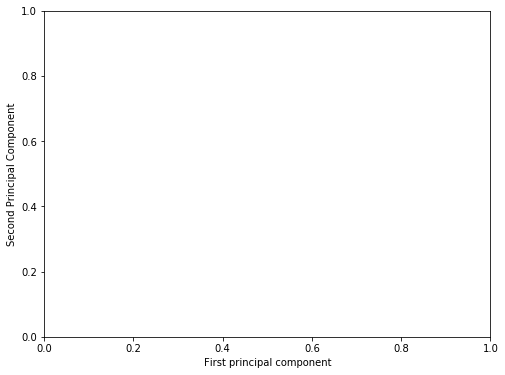

In [101]:
plt.figure(figsize=(8,6))
# plt.scatter(x_pca[:,0],x_pca[:,1],c=current['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
# understanding components
pca.components_
#df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [102]:
current.head()

,src_ip,dest_port_number,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency,length_password
0,1.0.139.35,1,6.503028,41,11,4,170.090011,4,9.560111
1,1.0.157.0,1,6.503028,52,17,4,170.090011,4,9.560111
2,1.0.182.29,1,6.503028,3,27,3,170.090011,3,9.560111
3,1.0.187.45,1,6.503028,1,2,4,170.090011,4,9.560111
4,1.0.190.251,1,6.503028,41,11,4,170.090011,4,9.560111


<Figure size 864x432 with 0 Axes>

In [103]:
current['src_ip'].dtype

dtype('O')

In [104]:
current['src_ip'].astype(float)

ValueError: could not convert string to float: '1.0.139.35'